In [149]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [150]:
# Loading the MNIST datasets - 60000 images for training and 10000 images for testing
(imageTrain, labelTrain), (imageTest, labelTest) = tf.keras.datasets.mnist.load_data()

# Splitting the training set into 2: 55000 images for training and 5000 images for validation
# Raw 2d array
imageTrainRaw = imageTrain[:55000]
labelTrainRaw = labelTrain[:55000]
imageValidRaw = imageTrain[55000:]
labelValidRaw = labelTrain[55000:]

# Processed 1d array
imageTrainPro = np.reshape(imageTrainRaw, (55000, 784))
imageTrainPro = preprocessing.normalize(imageTrainPro, norm="max")
labelTrainPro = np.zeros((55000, 10))
for idx in range(55000):
    labelTrainPro[idx][labelTrainRaw[idx]] = 1
imageValidPro = np.reshape(imageValidRaw, (5000, 784))
imageValidPro = preprocessing.normalize(imageValidPro, norm = "max")
labelValidPro = np.zeros((5000, 10))
for idx in range(5000):
    labelValidPro[idx][labelValidRaw[idx]] = 1
imageTestPro = np.reshape(imageTest, (10000, 784))
imageTestPro = preprocessing.normalize(imageTestPro, norm = "max")
labelTestPro = np.zeros((10000, 10))
for idx in range(10000):
    labelTestPro[idx][labelTest[idx]] = 1

0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    
0    0    0    0    0    0    0    0    0    0    0    0    3    18   18   18   126  136  175  26   166  255  247  127  0    0    0    0    
0    0    0    0    0    0    0    0    30   36   94   154  170  253  253  253  253  253  225  172  253  242  195  64   0    0    0    0    
0    0    0  

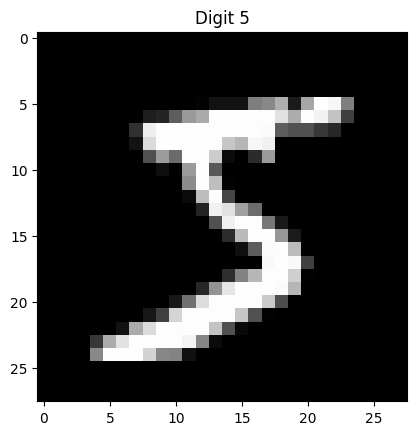

In [155]:
# Visualizing an image array
def visualizeArr(idx):
    imageArr = ""
    for row in imageTrainRaw[idx]:
        for col in row:
            if(len(str(col)) == 1):
                print(str(col) + "   ", end =" ")
                imageArr += str(col) + "   "
            elif(len(str(col)) == 2):
                print(str(col) + "  ", end =" ")
                imageArr += str(col) + "  "
            else:
                print(str(col) + " ", end =" ")
                imageArr += str(col) + " "
        print()
        imageArr += "\n"
    with open("./test/imageArr.txt", "w") as file:
        file.write(imageArr)
# Plotting an image
def plotImage(idx):
    plt.title(f"Digit {labelTrainRaw[idx]}")
    plt.imshow(imageTrainRaw[idx], cmap='gray')
    plt.savefig("./test/digitGrey.jpg")
    
visualizeArr(0)
plotImage(0)

In [152]:
# Setting up the neural network architecture and hyperparameters
inputLayer = 784  # input layer (28x28 pixels)
hiddenLayer1 = 512  # 1st hidden layer (14x14 pixel)
hiddenLayer2 = 256  # 2nd hidden layer
hiddenLayer3 = 128  # 3rd hidden layer
outputLayer = 10  # output layer (0-9 digits)

In [153]:
# Implement softmax function using cross-entropy and SGD
def softmax(y):
    e = np.exp(y)
    return e / sum(e)

def fLoss(theta, b, idx): # Using cross-entropy and SGD
    result = 0
    x = imageTrainPro[idx]
    yCal = theta.dot(x) + b
    yCal = softmax(yCal)
    yGiven = labelTrainPro[idx]
    for c in range(10):
        result += -(yGiven[c] * np.log(yCal[c]))
    return result

def dfLoss(theta, b, idx): # Using SGD
    x = imageTrainPro[idx]
    yCal = theta.dot(x) + b
    yCal = softmax(yCal)
    yGiven = labelTrainPro[idx]
    wRes = (yCal - yGiven).reshape(10,1).dot(x.reshape(1, 784))
    bRes =  yCal - yGiven
    return (wRes, bRes)

step = np.float_power(10, -4)
theta = np.random.rand(784, 10)
theta = np.reshape(theta, (10, 784))
b = np.random.rand(10)

it = 0
to_write = ""
lossPrev = fLoss(theta, b, np.random.randint(0, 55000)) 
     
while True:
    it += 1
    idx = np.random.randint(0, 55000)
    (w_dLoss, b_dLoss) = dfLoss(theta, b, idx)
    theta = theta - step * w_dLoss
    b = b - step * b_dLoss
    loss = fLoss(theta, b, idx)
    if(loss < lossPrev):
        lossPrev = loss
        thetaFin = theta
        bFin = b
        to_write += f"Loss: {'{0:.10f}'.format(loss)} - [It: {it}]\n"
        if(loss < np.float_power(10, -6)):
            with open("./test/lossMin.txt", "w") as file:
                file.write(to_write)
            break

In [154]:
count = 0
for i in range(5000):
    x_valid = imageValidPro[i]
    y_valid = softmax(theta.dot(x_valid) + b)
    result = np.argmax(y_valid)
    if(result == labelValidRaw[i]):
        count += 1
print((count / 5000))

0.8892
